# Mall Customers Clustering Project

## Step-by-Step Instructions

### Task 1: Data Loading & Preparation
- **Load the Dataset**: Import the mall customers dataset into a Pandas DataFrame.
- **Explore the Data**: View the first 10 rows, check data types, get descriptive statistics, and confirm there are no missing values.
- **Select Features for Clustering**: We focus on "Annual Income (k$)" and "Spending Score (1–100)".
- **Scale Features**: Standardize the numerical features to ensure fair clustering.

---

In [1]:
# Task 1: Data Loading and Preparation
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('mall customers.csv')

# Display first 10 rows
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [2]:
# Data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
# Summary statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# Check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# Select relevant features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale/normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### Task 2: Visual Exploratory Analysis

- **Scatter plot**: See "Annual Income" vs "Spending Score" to spot customer groupings.
- **Color by Gender / Age**: Use colors or shapes to highlight gender or age differences.
- **Observations**: Comment on visible clusters—do you see distinct customer groups?
---

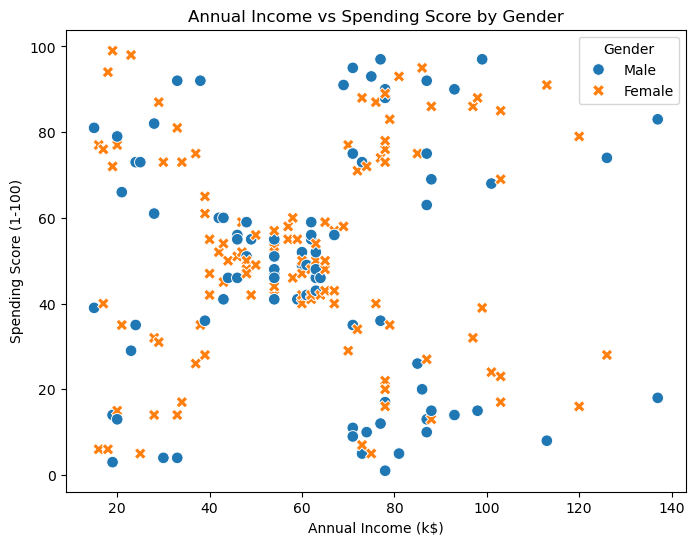

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot colored by Gender
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df,
                hue='Gender', style='Gender', s=70)
plt.title('Annual Income vs Spending Score by Gender')
plt.show()

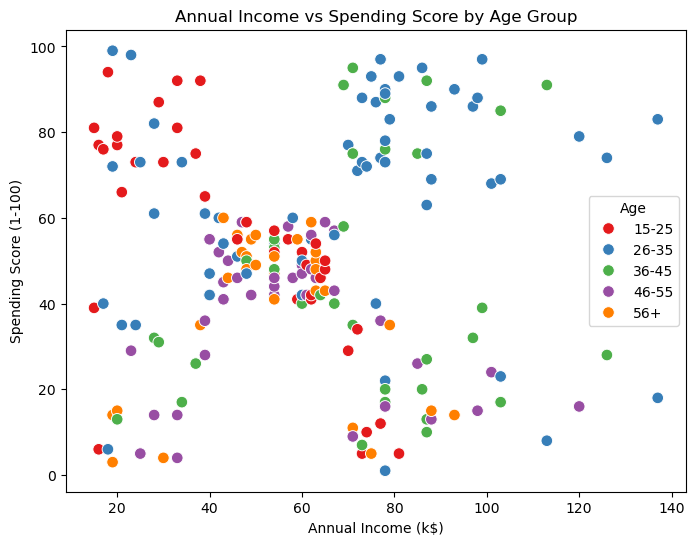

In [7]:
# Scatter plot colored by Age group
age_bins = pd.cut(df['Age'], bins=[15,25,35,45,55,70], labels=['15-25','26-35','36-45','46-55','56+'])
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df,
                hue=age_bins, palette='Set1', s=70)
plt.title('Annual Income vs Spending Score by Age Group')
plt.show()

**Observations:**
- Distinct clusters are visible: groups with high income/high spending, low income/low spending, etc.
- Gender and age group visualizations help show how customer segments may differ demographically.
---

### Task 3: K-Means Clustering

- **Run K-Means**: Use a range of k (2–8) and record inertia (within-cluster SS) and silhouette score for each.
- **Plot Elbow and Silhouette**: Decide optimal k.
- **Cluster Assignment**: Fit final K-Means using chosen k; save cluster labels.
- **Visualize Clusters**: Scatter plot customers colored by cluster assignment.
---

c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

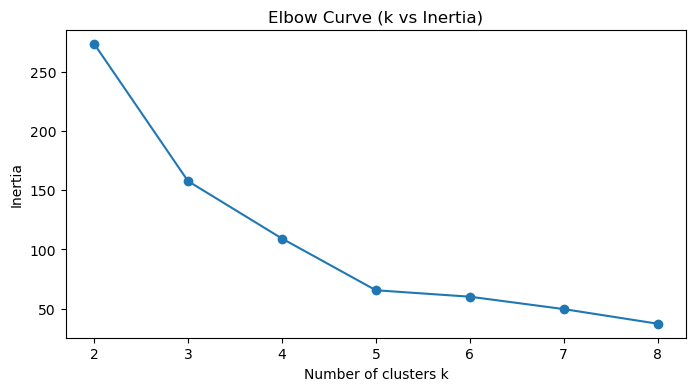

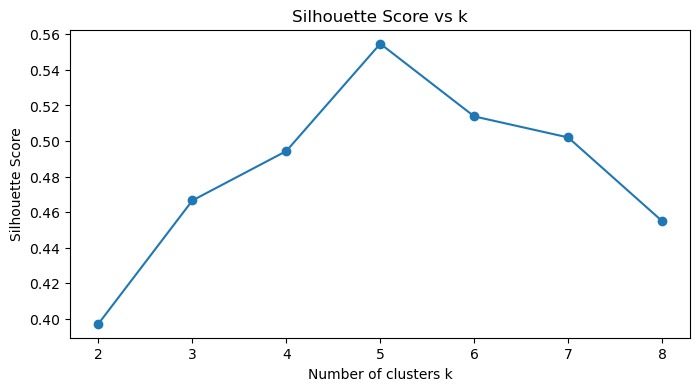

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
K = range(2, 9)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, labels))

# Elbow curve
plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'o-', label='Inertia')
plt.title('Elbow Curve (k vs Inertia)')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.show()

# Silhouette score plot
plt.figure(figsize=(8,4))
plt.plot(K, silhouette_scores, 'o-', label='Silhouette')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


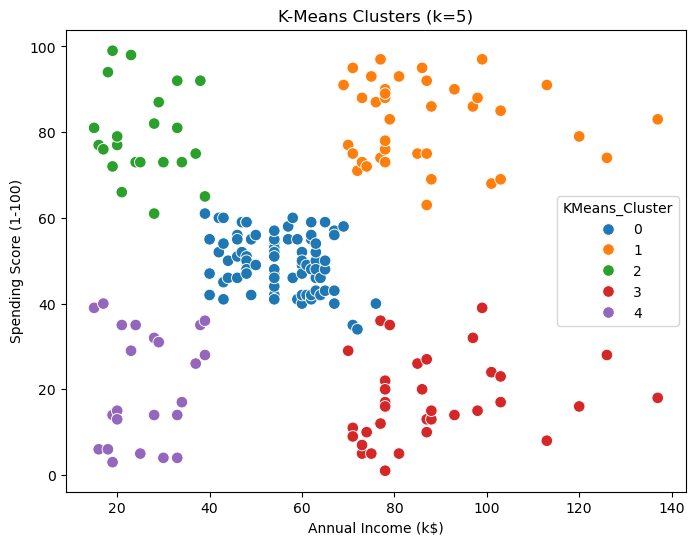

In [9]:
# Choose optimal k (usually k=5 for this dataset, but confirm with elbow/silhouette)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df,
                hue='KMeans_Cluster', palette='tab10', s=70)
plt.title(f'K-Means Clusters (k={optimal_k})')
plt.show()


**K-Means Conclusions:**
- The elbow curve and silhouette score help select the right cluster count (usually 5).
- K-Means reveals clear customer segments that might represent different marketing target groups.
---

### Task 4: Comparison with Agglomerative Hierarchical Clustering & DBSCAN

- **Hierarchical Clustering**: Fit agglomerative clustering, visualize clusters.
- **DBSCAN**: Try density-based clustering, visualize.
- **Compare**: Note cluster number/shape, discuss which method is more suitable for these data.
---

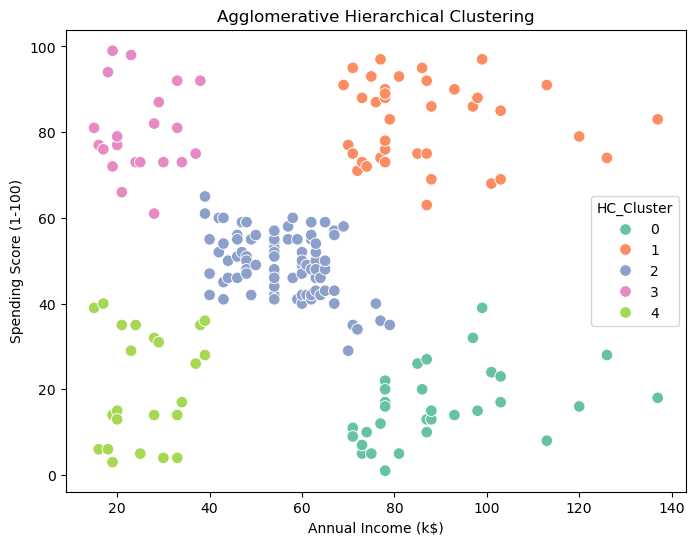

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=optimal_k)
df['HC_Cluster'] = hc.fit_predict(features_scaled)

# Visualize hierarchical clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df,
                hue='HC_Cluster', palette='Set2', s=70)
plt.title('Agglomerative Hierarchical Clustering')
plt.show()

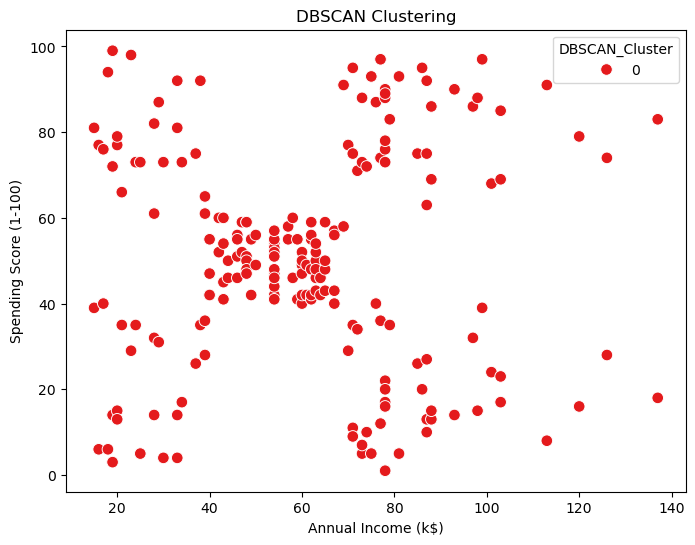

In [11]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(features_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df,
                hue='DBSCAN_Cluster', palette='Set1', s=70)
plt.title('DBSCAN Clustering')
plt.show()


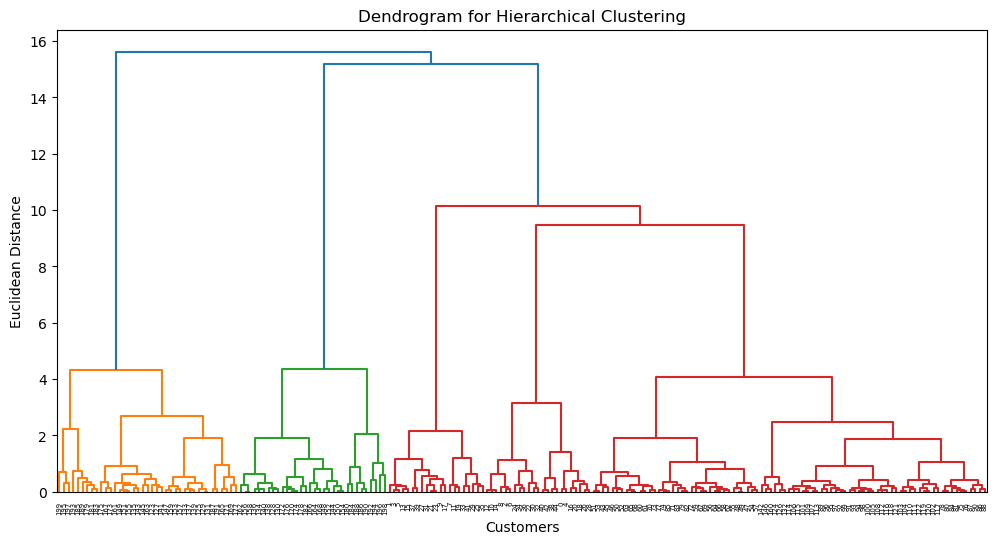

In [12]:
# Dendrogram (for deeper insight into hierarchy)
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(features_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()


### Comparative Conclusion

- **K-Means** gives compact, round clusters and works well for distinct, ellipse-shaped segments, which fits this dataset.
- **Hierarchical Clustering** shows how customer groups merge at various distance thresholds; helpful for identifying subgroups.
- **DBSCAN** can recognize clusters of arbitrary shape and outliers but sometimes creates too few or too many clusters on this data.
- **Overall**: For mall customers, K-Means is intuitive, widely interpretable, and ideal—yet it’s always valuable to compare approaches for robust segmentation.
---
